## Part C - Visualization and Insights based on Time Period of Comments/Posts

In [56]:
import pandas as pd

In [57]:
final_data = pd.read_csv('../Data/labelled_data.csv')

In [ ]:
# Convert the datatime column to a datetime object
final_data['readable_datetime'] = pd.to_datetime(final_data['readable_datetime'], format='mixed')

<Axes: title={'center': 'Number of OpenAI Reviews in Each Year'}, xlabel='Year', ylabel='Number of OpenAI Reviews'>

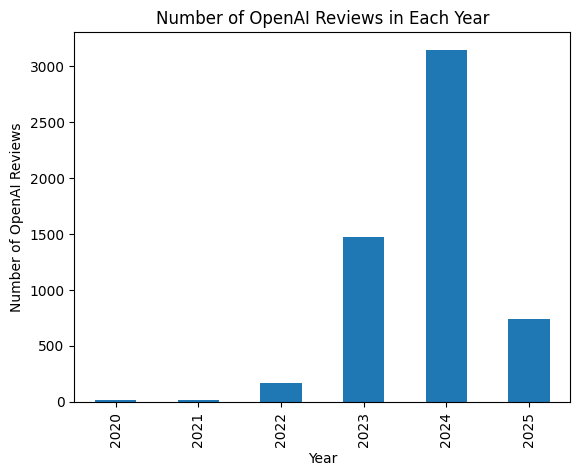

In [ ]:
# Plot the number of reviews in each year
review_counts = final_data['readable_datetime'].dt.year.value_counts().sort_index()

review_counts.plot.bar(xlabel="Year",
                       ylabel="Number of OpenAI Reviews",
                       title="Number of OpenAI Reviews in Each Year")

The number of posts about OpenAI in our dataset for each year correlates with the growth of OpenAI and the release of ChatGPT (OpenAI's most popular product):

1. [Release of ChatGPT](https://openai.com/index/chatgpt/) - November 2022
2. [ChatGPT hits 100 million weekly active users](https://www.theverge.com/2023/11/6/23948386/chatgpt-active-user-count-openai-developer-conference) - November 2023
3. [ChatGPT hits 300 million weekly active users](https://www.theverge.com/2024/12/4/24313097/chatgpt-300-million-weekly-users) - December 2024

*NOTE: While ChatGPT is only one of the many products of OpenAI, it is the largest and most popular one. Many of the advancements of the OpenAI's other products are also accompanied by advancements in ChatGPT. Therefore, the sentiments surrounding OpenAI broadly echo the sentiments of customers and users of ChatGPT.*

Since almost all the posts are on or after 2022, we will limit our further analysis to posts/comments posted between 2022 and 2025, and group reviews by yearly quarters, to enhance readability.

In [62]:
# Drop the rows before 2022 or after February 2025
final_data = final_data[(final_data['readable_datetime'] >= pd.Timestamp('2022-01-01')) &
                        (final_data['readable_datetime'] <= pd.Timestamp('2025-02-28'))]

In [63]:
# Create a new column for the quarter
final_data['quarter'] = final_data['readable_datetime'].dt.to_period("Q")

# Positive and Negative Reviews - Quarterly Counts

In [68]:
# Calculate the number of positive and negative reviews in each quarter
positive_review_counts = final_data[final_data['label'] == 1]['quarter'].value_counts().sort_index()
negative_review_counts = final_data[final_data['label'] == -1]['quarter'].value_counts().sort_index()

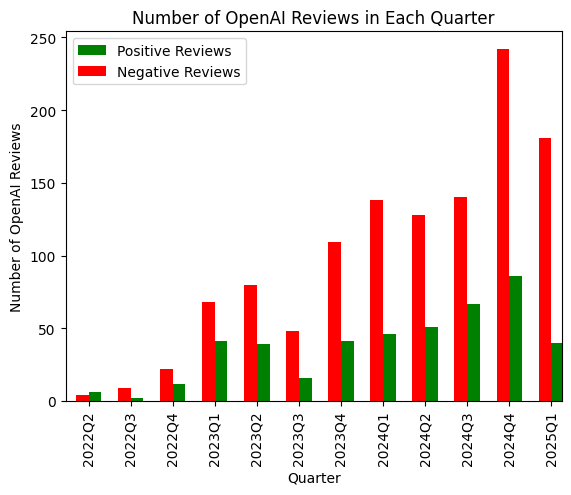

In [75]:
import matplotlib.pyplot as plt

# Plot both positive and negative reviews in each quarter in the same plot
fig, ax = plt.subplots()

positive_review_counts.plot(kind='bar', color='green', position=0, width=0.3, label='Positive Reviews')
negative_review_counts.plot(kind='bar', color='red', position=1, width=0.3, label='Negative Reviews')

ax.set_xlabel("Quarter")
ax.set_ylabel("Number of OpenAI Reviews")
ax.set_title("Number of OpenAI Reviews in Each Quarter")
ax.legend()

plt.show()

It is observed from the above bar chart that the number of positive and negative posts in each quarter correlate well with each other.